## Problem Statement:
Predictive Modeling for Disease Diagnosis

## Objective:
The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.

## Data Description: 

The dataset consists of the following attributes:
    
 Cholesterol: Level of cholesterol in the blood (mg/dL)

 Hemoglobin: Protein in red blood cells carrying oxygen

 Platelets: Blood cells aiding in clotting

 White Blood Cells (WBC): Immune system cells fighting infections

 Red Blood Cells (RBC): Cells carrying oxygen

 Hematocrit: Percentage of blood volume occupied by RBC

 Mean Corpuscular Volume (MCV): Average volume of RBC

 Mean Corpuscular Hemoglobin (MCH): Average amount of hemoglobin in RBC

 Mean Corpuscular Hemoglobin Concentration (MCHC): Average concentration of hemoglobin in RBC

 Insulin: Hormone regulating blood sugar levels

 BMI (Body Mass Index): Measure of body fat based on height and weight

 Systolic Blood Pressure (SBP): Pressure in arteries during heartbeats

 Diastolic Blood Pressure (DBP): Pressure in arteries at rest between beats

 Triglycerides: Type of fat found in blood (mg/dL)

 HbA1c (Glycated Hemoglobin): Measure of average blood sugar levels over past 2-3 months

 LDL (Low-Density Lipoprotein) Cholesterol: "Bad" cholesterol

 HDL (High-Density Lipoprotein) Cholesterol: "Good" cholesterol

 ALT (Alanine Aminotransferase): Liver enzyme

 AST (Aspartate Aminotransferase): Enzyme found in liver and heart

 Heart Rate: Number of heartbeats per minute (bpm)

 Creatinine: Waste product produced by muscles and filtered by kidneys

 Troponin: Protein released into bloodstream during heart muscle damage

 C-reactive Protein (CRP): Marker of inflammation in the body

 Disease: Binary indicator (1: Diseased, 0: Non-diseased)

In [9]:
### importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split


In [12]:
### load the data set

train_data = pd.read_csv("data sets\\train_data.csv")
test_data = pd.read_csv("data sets\\test_data.csv")

In [13]:
## leats combine 2 data frames

data = pd.concat([train_data,test_data],ignore_index=True)

In [14]:
## shows first five rows of dataset
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


### Preprocessing of data

In [23]:
## Shape of the data set

print("The number of rows(observations) is :",data.shape[0],'\n',"The number of columns(features) is :" ,data.shape[1])

The number of rows(observations) is : 2837 
 The number of columns(features) is : 25


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [18]:
data.Disease.value_counts()

Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: Disease, dtype: int64

In [20]:
## convert categorical data into numeric data type

def ref1(x):
    if x=='Healthy':
        return 0
    else:
        return 1
data['Disease'] = data['Disease'].map(ref1)

In [21]:
data.Disease.value_counts()

1    2276
0     561
Name: Disease, dtype: int64

In [22]:
## Disease: Binary indicator (1: Diseased, 0: Non-diseased)

In [24]:
# Now, let us check the basis measures of descriptive statistics for the continuous variable

data.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,...,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000
mean,0.384621,0.413031,0.568941,0.508157,0.510863,0.506205,0.506106,0.496309,0.488859,0.551795,...,0.447721,0.435470,0.536118,0.446217,0.460282,0.567101,0.440572,0.464101,0.445221,0.802256
std,0.262080,0.251023,0.278908,0.301621,0.279597,0.273070,0.287049,0.276560,0.310724,0.277234,...,0.269223,0.260077,0.274450,0.271631,0.253810,0.260580,0.242565,0.259814,0.254098,0.398368
min,0.001827,0.003088,0.000719,0.000006,-0.000206,0.000552,0.004556,0.000309,-0.000614,0.000719,...,-0.000991,0.001036,-0.000546,-0.000312,0.002047,0.002145,0.008831,0.005714,-0.000991,0.000000
25%,0.141529,0.223545,0.325035,0.202496,0.259467,0.258357,0.288132,0.287532,0.217207,0.319725,...,0.188792,0.231304,0.296264,0.214581,0.239659,0.335346,0.214560,0.288961,0.199513,1.000000
50%,0.357817,0.397638,0.597916,0.533962,0.527381,0.467431,0.493428,0.461418,0.448926,0.583470,...,0.466375,0.424560,0.512941,0.389440,0.486317,0.599542,0.428713,0.465957,0.489070,1.000000
75%,0.596150,0.603341,0.791215,0.771727,0.744950,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.670665,0.619900,0.779378,0.715823,0.620868,0.800666,0.645247,0.684140,0.633088,1.000000
max,0.991742,0.999606,0.997876,0.999507,0.999646,1.000000,1.000857,0.996362,0.999234,0.999666,...,0.999265,0.999567,1.000744,1.000326,1.000402,0.999857,0.999348,1.000125,0.999488,1.000000


In [25]:
for i in data.columns:
    print("************************",i,"*****************")
    print()
    print(set(data[i].tolist()))
    print()

************************ Glucose *****************

{0.7395967125241718, 0.8982223071328859, 0.4070433953356023, 0.6204792590153829, 0.4480246348605519, 0.5295615412244219, 0.5472640408775771, 0.8150886557018007, 0.6554581022370138, 0.2500719159100635, 0.6833284828841215, 0.164807951575775, 0.1787184713233294, 0.4127046288397009, 0.9407996349373215, 0.9916515308679774, 0.5230988957507989, 0.7327740082246961, 0.5062264761661637, 0.7371751426586088, 0.8381757757983708, 0.4931904685782007, 0.764196159620605, 0.8219138692312407, 0.3855312283501342, 0.0999824652796899, 0.2095935188792264, 0.2749844304559399, 0.8154860434153004, 0.7436872235252876, 0.6184718224354553, 0.7834843234938971, 0.6436638967556931, 0.4594899215102217, 0.175323289755338, 0.8805273249966379, 0.6557908212943633, 0.5872075726020503, 0.3814627319702699, 0.2275439978188682, 0.9279407820474904, 0.5456971580340202, 0.463517009536222, 0.937513745136764, 0.9237194141495176, 0.9631578156853716, 0.8232490282808591, 0.5264683922

In [26]:
## checking for null values
data.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

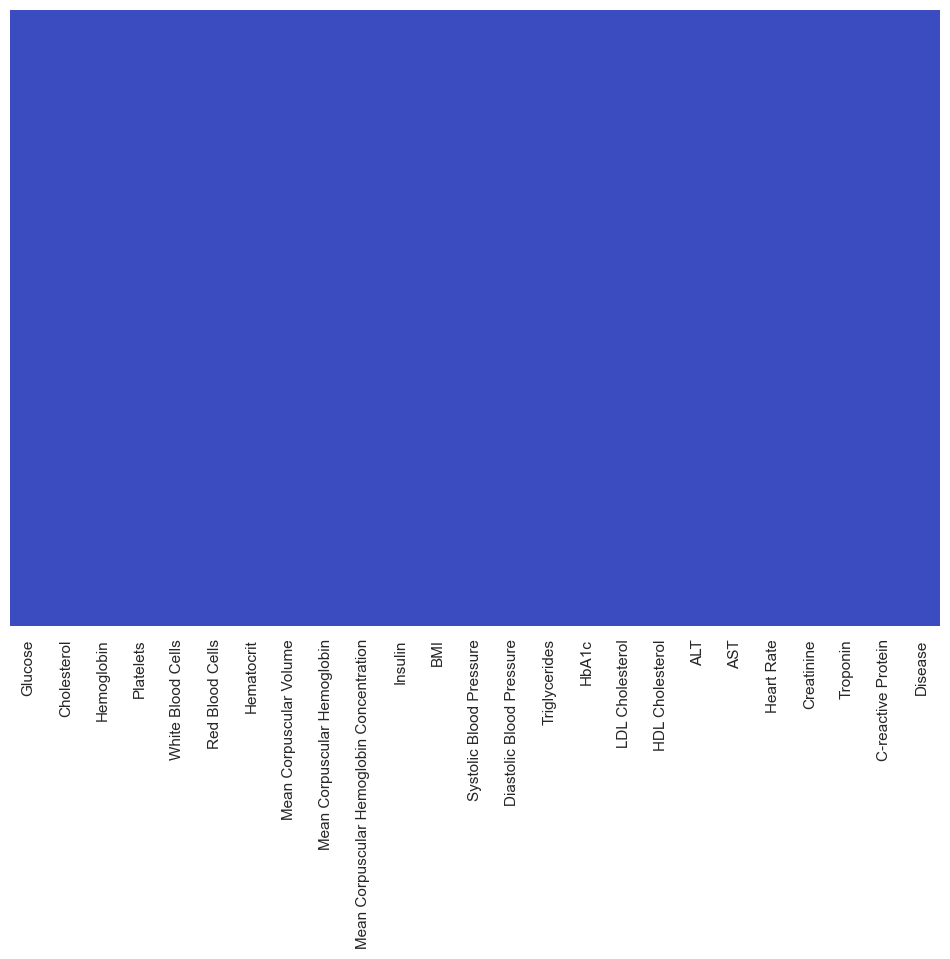

In [28]:
### let's visually check the null values in our data
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(),cbar = False,cmap = 'coolwarm',yticklabels= False)
plt.show()

In [30]:
### seperate the data into x and y variables

x = data.drop('Disease',axis = 1)
y = data['Disease']



In [33]:
## checking for outliers

Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3-Q1

UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR


In [34]:
((x > UL)|(x < LL)).sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [35]:
x

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


In [36]:
y

0       0
1       1
2       1
3       1
4       1
       ..
2832    1
2833    1
2834    1
2835    1
2836    1
Name: Disease, Length: 2837, dtype: int64

In [37]:
data['Disease'].value_counts()

1    2276
0     561
Name: Disease, dtype: int64

In [38]:
#### Balance the data by using smote technique

import imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

print("Before SMOTE :" ,y.value_counts())
print()
print("After SMOTE :" ,y_smote.value_counts())




Before SMOTE : 1    2276
0     561
Name: Disease, dtype: int64

After SMOTE : 0    2276
1    2276
Name: Disease, dtype: int64


In [39]:
## Split the data

x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size =0.25,random_state=1,stratify=y_smote)

## Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score,f1_score,classification_report

#### Logistic regression

In [46]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [49]:
print(classification_report(y_train, train_pred_lr))
print()
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1707
           1       1.00      0.92      0.96      1707

    accuracy                           0.96      3414
   macro avg       0.96      0.96      0.96      3414
weighted avg       0.96      0.96      0.96      3414


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       569
           1       1.00      0.91      0.95       569

    accuracy                           0.96      1138
   macro avg       0.96      0.96      0.96      1138
weighted avg       0.96      0.96      0.96      1138



In [50]:
print(accuracy_score(y_train, train_pred_lr))
print()
print(accuracy_score(y_test,test_pred_lr))

0.9575278265963679

0.9551845342706503


In [51]:
print(f1_score(y_train, train_pred_lr))
print()
print(f1_score(y_test,test_pred_lr))

0.9556981362664223

0.953168044077135


In [53]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_reduced = scaler.fit_transform(x_train)
x_test_reduced = scaler.transform(x_test)

In [54]:
# model fit
lr1 = LogisticRegression()
lr1.fit(x_train_reduced,y_train)
# test set predict
test_pred1 = lr1.predict(x_test_reduced)
# train set predict
train_pred1 = lr1.predict(x_train_reduced)

In [55]:
print(accuracy_score(y_train, train_pred1))
print()
print(accuracy_score(y_test,test_pred1))

0.9669009958992384

0.9701230228471002


### Decision TreeClassifier

In [63]:
## create model

dt = DecisionTreeClassifier()

# model fit
dt.fit(x_train_reduced,y_train)

#3 prediction

train_pred_dt = dt.predict(x_train_reduced)

test_pred_dt = dt.predict(x_test_reduced)

In [65]:
print(classification_report(y_train,train_pred_dt))
print()
print(classification_report(y_test,test_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1707
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       569

    accuracy                           1.00      1138
   macro avg       1.00      1.00      1.00      1138
weighted avg       1.00      1.00      1.00      1138



In [66]:
print(accuracy_score(y_train,train_pred_dt))
print()
print(accuracy_score(y_test,test_pred_dt))

1.0

0.9982425307557118


## Random Forest

In [67]:
rft=RandomForestClassifier(n_estimators=12, criterion="entropy", random_state=0)
rft.fit(x_train_reduced,y_train)


# test set predict
test_pred_rft = rft.predict(x_test_reduced)
# train set predict
train_pred_rft = rft.predict(x_train_reduced)


In [68]:
print(classification_report(y_train,train_pred_rft))
print()
print(classification_report(y_test, test_pred_rft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1707
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       569

    accuracy                           1.00      1138
   macro avg       1.00      1.00      1.00      1138
weighted avg       1.00      1.00      1.00      1138



In [69]:
print("Training Accuracy", accuracy_score(y_train, train_pred_rft))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_rft))

Training Accuracy 1.0

Test Accuracy 0.9991212653778558


### Gradient BoostingClassifier

In [57]:
gb = GradientBoostingClassifier()
gb.fit(x_train_reduced,y_train)

# test set predict
test_pred_gb = lr1.predict(x_test_reduced)
# train set predict
train_pred_gb = lr1.predict(x_train_reduced)



In [58]:
print(classification_report(y_train, train_pred_gb))
print()
print(classification_report(y_test,test_pred_gb))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1707
           1       1.00      0.93      0.97      1707

    accuracy                           0.97      3414
   macro avg       0.97      0.97      0.97      3414
weighted avg       0.97      0.97      0.97      3414


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       569
           1       1.00      0.94      0.97       569

    accuracy                           0.97      1138
   macro avg       0.97      0.97      0.97      1138
weighted avg       0.97      0.97      0.97      1138



In [60]:
print(accuracy_score(y_train, train_pred_gb))
print()
print(accuracy_score(y_test,test_pred_gb))

0.9669009958992384

0.9701230228471002


## XGBClassifier

In [72]:
# create model
xg = XGBClassifier()
# model fit
xg.fit(x_train_reduced,y_train)
# test set predict
test_pred_xg = xg.predict(x_test_reduced)
# train set predict
train_pred_xg = xg.predict(x_train_reduced)

In [73]:
print(classification_report(y_train,train_pred_xg))
print()
print(classification_report(y_test, test_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1707
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       569

    accuracy                           1.00      1138
   macro avg       1.00      1.00      1.00      1138
weighted avg       1.00      1.00      1.00      1138



In [74]:
print("Training Accuracy", accuracy_score(y_train, train_pred_xg))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_xg))

Training Accuracy 1.0

Test Accuracy 0.9991212653778558


### KNN Model

In [75]:
knn=KNeighborsClassifier(n_neighbors=9, metric="euclidean",)
knn.fit(x_train_reduced,y_train)


# test set predict
test_pred_knn = knn.predict(x_test_reduced)
# train set predict
train_pred_knn = knn.predict(x_train_reduced)


In [76]:
print(classification_report(y_train,train_pred_knn))
print()
print(classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1707
           1       1.00      0.95      0.97      1707

    accuracy                           0.97      3414
   macro avg       0.98      0.97      0.97      3414
weighted avg       0.98      0.97      0.97      3414


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       569
           1       1.00      0.92      0.96       569

    accuracy                           0.96      1138
   macro avg       0.96      0.96      0.96      1138
weighted avg       0.96      0.96      0.96      1138



In [77]:
print("Training Accuracy", accuracy_score(y_train, train_pred_knn))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_knn))

Training Accuracy 0.9748096074985354

Test Accuracy 0.961335676625659


### Support Vector Machine

In [78]:
svc=SVC(C=1, kernel="rbf",degree=3)
svc.fit(x_train_reduced,y_train)


# test set predict
test_pred_svc = svc.predict(x_test_reduced)
# train set predict
train_pred_svc = svc.predict(x_train_reduced)


In [79]:
print(classification_report(y_train,train_pred_svc))
print()
print(classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1707
           1       1.00      1.00      1.00      1707

    accuracy                           1.00      3414
   macro avg       1.00      1.00      1.00      3414
weighted avg       1.00      1.00      1.00      3414


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       569
           1       1.00      1.00      1.00       569

    accuracy                           1.00      1138
   macro avg       1.00      1.00      1.00      1138
weighted avg       1.00      1.00      1.00      1138



In [80]:
print("Training Accuracy", accuracy_score(y_train, train_pred_svc))
print()
print("Test Accuracy", accuracy_score(y_test,test_pred_svc))

Training Accuracy 0.9997070884592852

Test Accuracy 1.0
